In [1]:
#importing Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm, neighbors
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#import the dataset
data = pd.read_csv(r'C:\Users\pc\Documents\Heart_disease.csv')

In [3]:
#Check out the first 7 columns
data.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


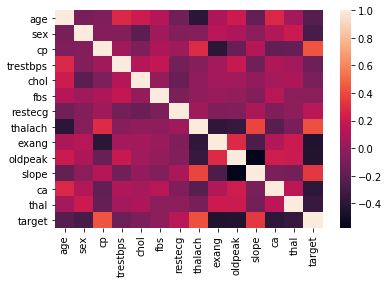

In [6]:
#Lemme check out the correlation usinfg a heatmap
correlation = data.corr()
sns.heatmap(correlation)

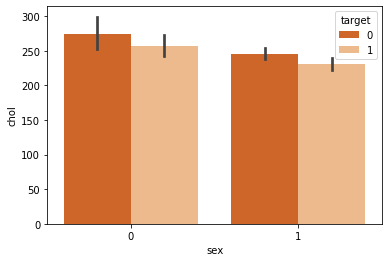

In [7]:
#Using barplot to visualize the effect of sex/ gender on trestbp where 0 =male and 1= female
sns.barplot(data=data, x='sex', y='chol', hue= 'target', palette='Oranges_r')

In [8]:
#Voting for the 5 different classifiers to know which will predict the accuracy.
#The 5 classifiers are knn, svm, logistic regresssion, random forest and decision tree
#The knn = K-Nearest Neighbors

Logistic_clf = LogisticRegression()
Random_clf = RandomForestClassifier()
KNN_clf = neighbors.KNeighborsClassifier()
SVM_clf = svm.SVC()
Decision_clf = DecisionTreeClassifier


In [9]:
#Scaling the columns
#Standard Scaler is used to reduce the values of the parameters to the mean and standard deviation
#of between 0 And 1
from sklearn.preprocessing import StandardScaler
StandardScaler =StandardScaler()

columns_to_scale =(['age',
                   'trestbps',
                   'chol',
                   'thalach',
                   'oldpeak'])
data[columns_to_scale ] = StandardScaler.fit_transform(data[columns_to_scale])


In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [11]:
#Checking out foe the NANs
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#This simply means that there's no NAN
#So I can now proceed to the training my model
vot_clf = VotingClassifier(estimators = [('lr', Logistic_clf), ('rnd', Random_clf), ('knn', KNN_clf),('svm', SVM_clf)], voting = 'hard')

In [13]:
X= data.drop(['target'], axis=1)
y=data['target']
print(len(X))
print(len(y))

303
303


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [15]:
print(X_train.size)
print(y_train.size)
print(X_test.size)
print(y_test.size)

3146
242
793
61


In [16]:
from sklearn.metrics import accuracy_score

In [17]:
#Function to return the accuracy score of the 4 classifiers in use
for clf in (Logistic_clf, Random_clf, KNN_clf, SVM_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8524590163934426
RandomForestClassifier 0.819672131147541
KNeighborsClassifier 0.8688524590163934
SVC 0.8688524590163934
